# Land Cover Data Collection

A land cover code is a classification system used to categorize the physical and biophysical attributes of the Earth's surface, such as forests, grasslands, water, or built-up areas. These codes are used in mapping and geographic information systems (GIS) to standardize and describe different types of land cover, with popular systems including the Land Cover Classification System (LCCS) developed by the UN Food and Agriculture Organization (FAO). 

In [19]:
data_folder = "../../data/raw/"
data_files = { 
    "fire_dz": "fire/viirs-jpss1_2024_Algeria.csv",
    "fire_tn": "fire/viirs-jpss1_2024_Tunisia.csv",
    "landcover_dz": "landcover/landcover_dz/dza_gc_adg.shp",
    "landcover_tn": "landcover/landcover_tn/tun_gc_adg.shp", 
    "landcover_legend": "landcover/landcover_dz/globcover_LCCS_legend_africa.xls",
    "climate_prec": "climate/wc2.1_cruts4.09_5m_prec_2020-2024",
    "climate_tmax": "climate/wc2.1_cruts4.09_5m_tmax_2020-2024",
    "climate_tmin": "climate/wc2.1_cruts4.09_5m_tmin_2020-2024",
    "elevation": "elevation/be15_grd/be15_grd",
    "dz_boundaries": "boundaries/gadm41_DZA_shp/gadm41_DZA_0.shp",
    "tn_boundaries": "boundariesgadm41_TUN_shp/gadm41_TUN_0.shp",
    "soil_bil": "soil/HWSD2_RASTER/HWSD2.bil",
    "soil_csv": "HWSD2_DB/HWSD2_LAYERS.csv"
}

output_folder = "../../data/processed"
output_folders = {
    "fire": "fire",
    "landcover": "landcover",
    "climate": "climate",
    "elevation": "elevation",
    "soil": "soil"
}

In [6]:
import pandas as pd
import os
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt
import geopandas
from dbfread import DBF

### Merging the Data

#### Algeria Data

In [7]:
landcover_dz_filepath = os.path.join(data_folder, data_files["landcover_dz"])

# Read the shapefile into a GeoDataFrame
landcover_dz_gdf = geopandas.read_file(landcover_dz_filepath)

print(landcover_dz_gdf.info())

print(landcover_dz_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386454 entries, 0 to 386453
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        386454 non-null  int32   
 1   GRIDCODE  386454 non-null  int32   
 2   AREA      386454 non-null  float64 
 3   LCCCODE   386454 non-null  object  
 4   geometry  386454 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 11.8+ MB
None
   ID  GRIDCODE          AREA       LCCCODE  \
0   4       210  6.228187e+06  7001 // 8001   
1   2       210  6.242408e+06  7001 // 8001   
2   1       210  1.482995e+06  7001 // 8001   
3   8        50  4.590841e+08  21497-121340   
4  13       210  6.371533e+06  7001 // 8001   

                                            geometry  
0  POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...  
1  POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...  
2  POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...  
3  POLYGON 

In [8]:
print(landcover_dz_gdf.crs)

EPSG:4326


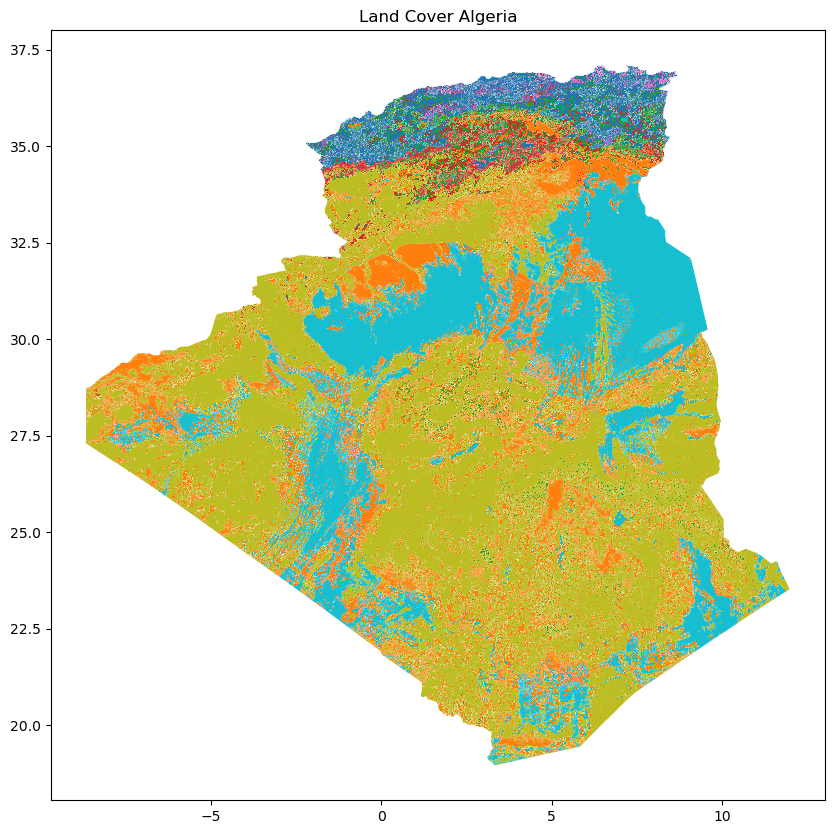

In [9]:
landcover_dz_gdf.plot(column='LCCCODE', legend=False, figsize=(10, 10))
plt.title('Land Cover Algeria')
plt.show()

####  Tunisia Data


In [10]:
landcover_tn_filepath = os.path.join(data_folder, data_files["landcover_tn"])

# Read the shapefile into a GeoDataFrame
landcover_tn_gdf = geopandas.read_file(landcover_tn_filepath)

print(landcover_tn_gdf.info())
print(landcover_tn_gdf.head())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52059 entries, 0 to 52058
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   AREA_M2   52059 non-null  float64 
 1   ID        52059 non-null  int32   
 2   GRIDCODE  52059 non-null  int32   
 3   LCCCode   52059 non-null  object  
 4   geometry  52059 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 1.6+ MB
None
     AREA_M2  ID  GRIDCODE                  LCCCode  \
0  3110936.0   1       210             7001 // 8001   
1   982723.0   3        20              0003 / 0004   
2   151388.0   2        30             0004 // 0003   
3   151391.0   6       120  21454 // 21446 // 21450   
4   151391.0   4        70             21499-121340   

                                            geometry  
0  POLYGON ((8.89941 37.52083, 8.89923 37.52117, ...  
1  POLYGON ((8.94028 37.52361, 8.94028 37.52917, ...  
2  POLYGON ((8.94583 37.5347

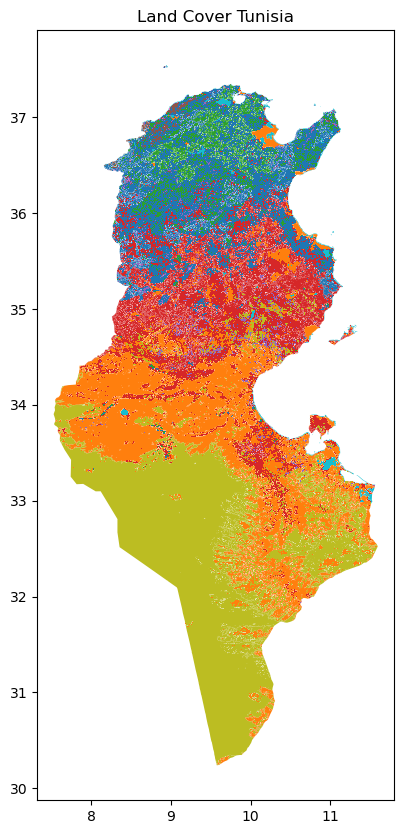

In [11]:
landcover_tn_gdf.plot(column='LCCCode', legend=False, figsize=(10, 10))
plt.title('Land Cover Tunisia')
plt.show()

#### Merging Landcover Data

In [12]:
# Renamed the columns because of name mismatch
landcover_tn_gdf = landcover_tn_gdf.rename(columns={'LCCCode': 'LCCCODE', 'AREA_M2': 'AREA'})

In [13]:
landcover_dz_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386454 entries, 0 to 386453
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        386454 non-null  int32   
 1   GRIDCODE  386454 non-null  int32   
 2   AREA      386454 non-null  float64 
 3   LCCCODE   386454 non-null  object  
 4   geometry  386454 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 11.8+ MB


In [14]:
def merge_shapefiles(dz_gdf, tn_gdf):
    # Ensure both shapefiles use the same CRS 
    if dz_gdf.crs != tn_gdf.crs:
        tn = tn.to_crs(dz_gdf.crs)

    # Concatenate the GeoDataFrames
    boundaries = geopandas.GeoDataFrame(pd.concat([dz_gdf, tn_gdf], ignore_index=True), crs=dz_gdf.crs)

    return boundaries


In [15]:
landcover_gdf = merge_shapefiles(landcover_dz_gdf, landcover_tn_gdf)
landcover_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438513 entries, 0 to 438512
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        438513 non-null  int32   
 1   GRIDCODE  438513 non-null  int32   
 2   AREA      438513 non-null  float64 
 3   LCCCODE   438513 non-null  object  
 4   geometry  438513 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 13.4+ MB


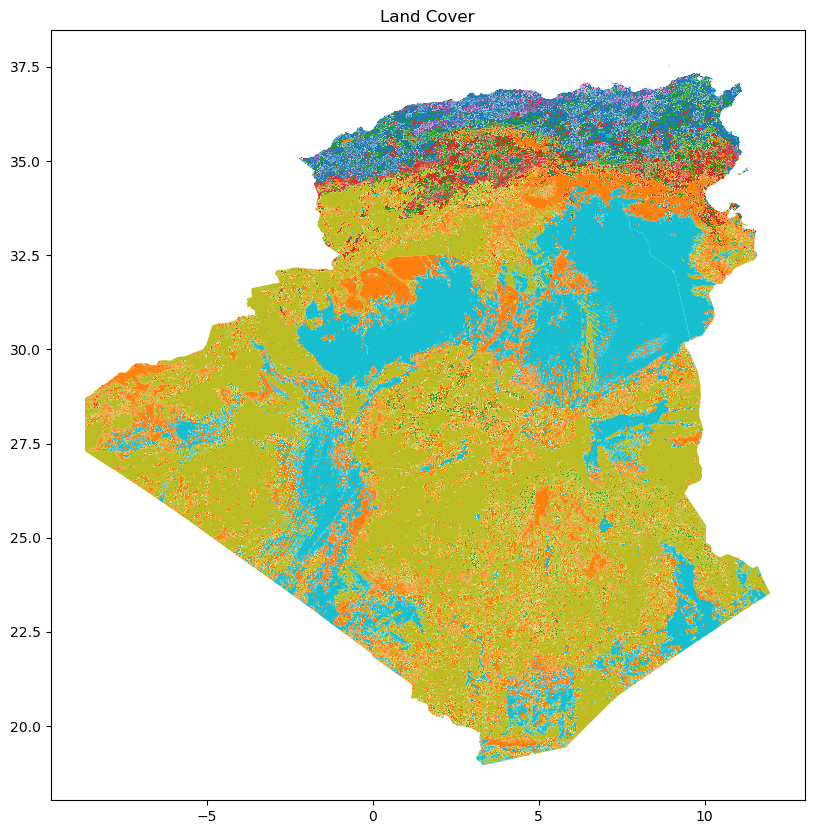

In [16]:
landcover_gdf.plot(column='LCCCODE', legend=False, figsize=(10, 10))
plt.title('Land Cover')
plt.show()

## Saving the Land Cover Data to a `csv` File

I wanted to save it as a shapfile, but had issues with the values of AREA.

In [17]:
output_base = os.path.join(output_folder, output_folders["landcover"])
os.makedirs(output_base, exist_ok=True)

output_filepath = os.path.join(output_base, "landcover.csv")

landcover_gdf.to_csv(output_filepath, index=False)


## Loading the Legend

After installing `xlrd`:

In [20]:
landcover_legend_filepath = os.path.join(data_folder, data_files["landcover_legend"])

xls = pd.ExcelFile(landcover_legend_filepath) 

legend_df = xls.parse(0) 
legend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LC           45 non-null     object 
 1   LPos         45 non-null     float64
 2   LCCCode      45 non-null     object 
 3   LCCMode      45 non-null     float64
 4   LCCLevel     45 non-null     object 
 5   LCCOwnLabel  45 non-null     object 
 6   LCCOwnDescr  0 non-null      float64
 7   LCCLabel     47 non-null     object 
 8   MapCode      45 non-null     object 
dtypes: float64(3), object(6)
memory usage: 3.4+ KB


In [ ]:
legend_df.head()

,LC,LPos,LCCCode,LCCMode,LCCLevel,LCCOwnLabel,LCCOwnDescr,LCCLabel,MapCode
0,9Mixed Class,1.0,41653-R1 // 41653-R2,0.0,A3A20B2C1D1E2-R1 // A3A20B2C1D1E2-R2,Closedto open broadleavedforest regularly floo...,NaN,Closed to Open Broadleaved Deciduous Woodland ...,160
1,Error,1.0,41739-R1,0.0,A3A20B2C2D1E2-R1,Closed to open broadleaved forest on temporare...,NaN,Closed to Open Broadleaved Deciduous Woodland ...,161
2,0Dichotomous Phase,1.0,0007,0.0,A24,Closed to open grassland or woody vegetation o...,NaN,Natural And Semi-Natural Aquatic or Regularly ...,180
3,9Mixed Class,1.0,41521-R1 // 41521-R2 // 41597-R1 // 41597-R2,0.0,A1A20B1C1-R1 // A1A20B1C1-R2 // A1A20B1C3-R1 /...,Closed to open woody vegetation on regularly f...,NaN,Closed to Open Woody Vegetation On Permanently...,181
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quality: Fresh Water\r\n // Closed to Open Woo...,NaN


## Saving the Legend Data to a `csv` File

In [21]:
output_filepath = os.path.join(output_base, "legend.csv")

legend_df.to_csv(output_filepath, index=False)